In [1]:
import dinkum
from dinkum.vfg import Gene, Receptor
from dinkum.vfn import Tissue
#from dinkum import Timecourse

from dinkum.display import MultiTissuePanel, tc_record_activity

In [2]:
dinkum.reset()

In [12]:
# define a Gene with name 'X', assign it to variable 'x' in Python
x = Gene(name='X')

In [13]:
# define another Gene with name 'Y', assign it to variable 'y' in Python
y = Gene(name='Y')

In [14]:
# create a Tissue, and add genes to it.
m = Tissue(name='M')

In [15]:
# run for 5 ticks (1 to 5)
states, tissues, is_active_fn = tc_record_activity(stop=5)

start=1 stop=5


In [16]:
# create a display
mp = MultiTissuePanel(states=states, tissue_names=['M'], genes_by_name=['X', 'Y'])

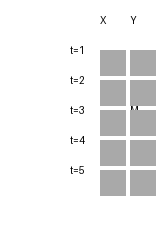

In [17]:
mp.draw(is_active_fn)

Underwhelming, ehh? We haven't turned any genes on!

@CTB why is M where it is...

In [18]:
x.is_present(where=m, start=1)
# @CTB shouldn't M be a tissue name, rather than a tissue object?

start=1 stop=5


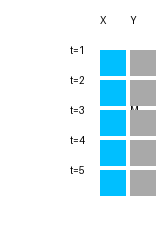

In [21]:
# run for 5 ticks (1 to 5)
states, tissues, is_active_fn = tc_record_activity(stop=5)
# @CTB why is all this returned, can we make it simpler??
mp = MultiTissuePanel(states=states, tissue_names=['M'], genes_by_name=['X', 'Y'])
# @CTB have 'mp' object by default draw?
mp.draw(is_active_fn)

Still underwhelming - we haven't defined any regulatory relationships!

start=1 stop=5


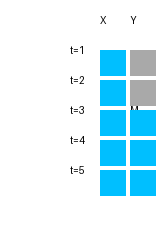

In [26]:
dinkum.reset()

# @CTB allow updating of rules instead of resetting?
x = Gene(name='X')
y = Gene(name='Y')
m = Tissue(name='M')

x.is_present(where=m, start=1)


# now define a regulatory relationship!
y.activated_by(source=x, delay=2)

# run for 5 ticks (1 to 5)
states, tissues, is_active_fn = tc_record_activity(stop=5)
mp = MultiTissuePanel(states=states, tissue_names=['M'], genes_by_name=['X', 'Y'])
mp.draw(is_active_fn)

## Possible cell-autonomous interactions

There are many possible gene-gene interactions *within* a cell.

We've already seen two - `is_present(where=tissue, start=None, duration=None)` and `activated_by(source, delay=1)`.

Here's their description:

* `is_present(where=tissue, start=None, duration=None)` - this gene is constitutively "on" from tick `start` for duration `duration`.
* `activated_by(source, delay=1)` - `source` is an upstream activator that acts at the given delay (in ticks).

Here are the remaining cell autonomous gene interactions that we have implemented:

* `activated_or(sources=[...], delay=1)` - `sources` is a list of upstream activators, any one of which suffices to activate this gene.
* `and_not(activator=..., repressor=..., delay=1)` - `actvator` activates unless `repressor` is active.
* `activated_by_and(sources=[...], delay=1)` - `sources` is a list of upstream activators, all of which must be present to activate this gene.
* `toggle_repressed(tf=..., cofactor=..., delay=1)` - this gene is repressed if `tf` is absent, or if `tf` is present without `cofactor`; it is active if both`tf` and `cofactor` are present. **@CTB isn't this basically the same as activated_by_and?**


## Side note: introducing lists

`activated_or` and `activated_by_and` both take *lists* of genes, as opposed to a single gene. The notation is as follows:

In [ ]:
dinkum.reset()

# @CTB allow updating of rules instead of resetting?
x = Gene(name='X')
y = Gene(name='Y')
z = Gene(name='Z')
m = Tissue(name='M')

x.is_present(where=m, start=1, duration=2)

y.is_present(where=m, 

# run for 10 ticks
states, tissues, is_active_fn = tc_record_activity(stop=10)
mp = MultiTissuePanel(states=states, tissue_names=['M'], genes_by_name=['X', 'Y', 'Z'])
mp.draw(is_active_fn)